# Toxic Comment Detection


Social media and online platforms have significantly enhanced interaction and communication among people, facilitating information sharing and community building. However, these platforms have also become a breeding ground for toxic comments and negative behavior. Toxic comments can have severe psychological effects on individuals, disrupt community dynamics, and negatively impact the overall user experience. Therefore, developing a model that can understand and identify toxic comments is crucial for improving the quality of communication in the digital world.<br>

Toxic comments often include insults, derogatory remarks, threats, hate speech, and rude behavior. Such comments can cause significant emotional and psychological issues for the targeted individuals, such as stress, anxiety, and depression. Additionally, toxic behavior can divide communities and make it difficult for platforms to provide a safe and friendly environment. Therefore, a model that can automatically detect toxic comments and prevent such content is necessary to enhance user experience.<br>

The development of such a model is possible thanks to advancements in artificial intelligence and machine learning. Using natural language processing (NLP) techniques, algorithms can be created to identify and analyze toxic content. These algorithms can be trained on large datasets to learn the difference between toxic and non-toxic content, allowing them to detect toxic comments in real time. Such a system can assist moderators and platform administrators in quickly addressing harmful content and intervening when necessary.<br>

The benefits of a model that understands toxic comments extend beyond individuals and communities. It also helps protect the reputation of online platforms, increase user engagement, and create a healthier and more sustainable digital ecosystem in the long term. Users will feel safer, spend more time on the platforms, and engage in more positive interactions.<br>

In conclusion, developing a model that can understand and identify toxic comments is a critical need in the digital communication world. Such a model not only protects the psychological well-being of individuals but also contributes to the development of more friendly and constructive online communities. Therefore, efforts in artificial intelligence and machine learning should focus on detecting and preventing toxic comments, helping to make the digital world a healthier place.<br>

<a style="font-size: 20px" href="https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge" target="_blank">Toxic Comment Classification Challenge</a>

<a href="www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview/description" target="_blank">Description from Kaggle:</a><br>Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). So far they’ve built a range of publicly available models served through the Perspective API, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content).

In this competition, you’re challenged to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models. You’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current model will hopefully help online discussion become more productive and respectful.

<div style="color:red; font-size:20px;"><a href="https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview/evaluation" target="_blank">Evaluation metric</a> is <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic" target="_blank">ROC curve.</a></div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cloud-picture/cloud.png
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
import zipfile
path_list=["/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip","/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip","/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip","/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip"]
labels=["sample_submission","test","test_labels","train"]
for path, label in zip(path_list, labels):
    with zipfile.ZipFile(path, 'r') as zip_arsivi:
        zip_arsivi.extractall(label)
        print(f"{label} is extracted")

sample_submission is extracted
test is extracted
test_labels is extracted
train is extracted


In [3]:
test=pd.read_csv("/kaggle/working/test/test.csv")
test_labels=pd.read_csv("/kaggle/working/test_labels/test_labels.csv")
sample_submission=pd.read_csv("/kaggle/working/sample_submission/sample_submission.csv")
train=pd.read_csv("/kaggle/working/train/train.csv")

In [4]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [6]:
sample_submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [9]:
train['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [10]:
x=train['comment_text']
y=train['toxic']

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [13]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,3),max_features=10000)

In [14]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [15]:
train["comment_text"]=train["comment_text"].str.lower()

In [16]:
train["comment_text"]=train["comment_text"].str.replace('[^\w\s]','',regex=True)
train["comment_text"]=train["comment_text"].str.replace('\d+','',regex=True)
train["comment_text"]=train["comment_text"].str.replace('\n',' ',regex=True)

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('/kaggle/input/cloud-picture/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

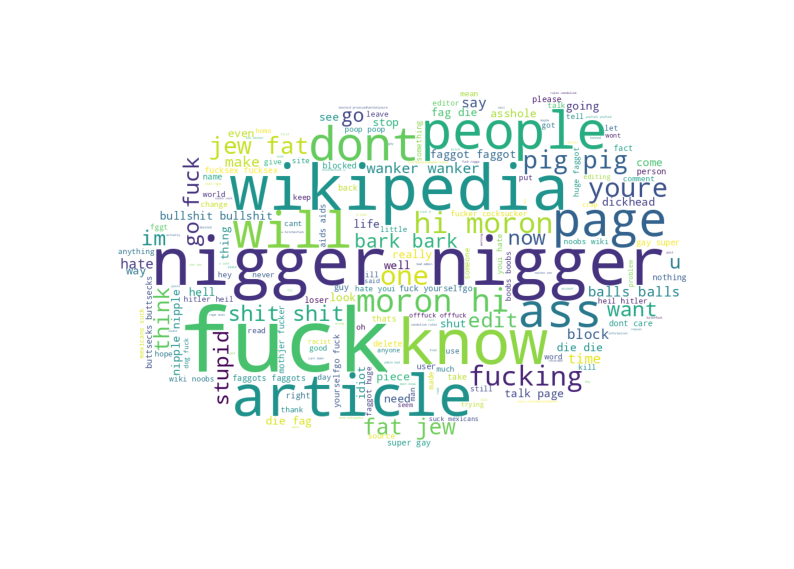

In [19]:
wc(train[train['toxic']==1]['comment_text'].values,'white')

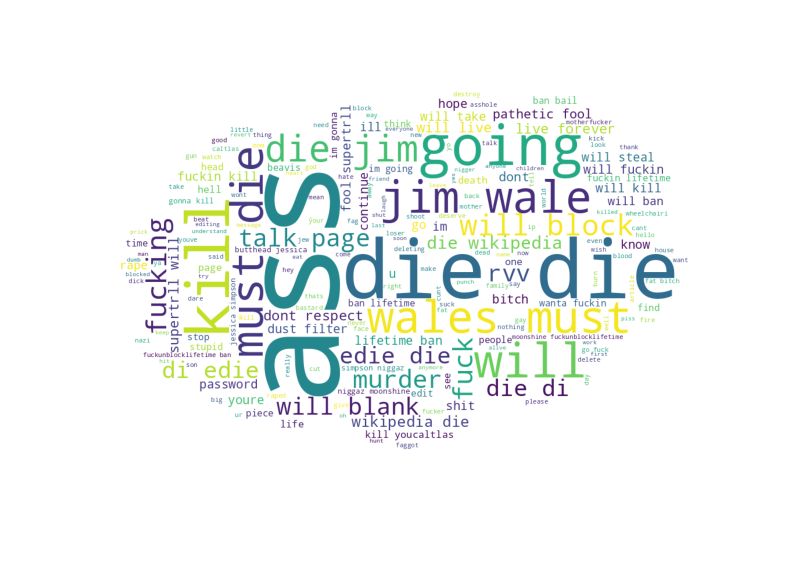

In [20]:
wc(train[train['threat']==1]['comment_text'].values,'white')

In [21]:
from sklearn.model_selection import train_test_split
x = train["comment_text"]
y = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train_vec = vect.fit_transform(x_train)
x_test_vec = vect.fit_transform(x_test)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
model_multi = MultiOutputClassifier(RandomForestClassifier())
model_multi.fit(x_train_vec, y_train)
y_pred = model_multi.predict(x_test_vec)

for i, target in enumerate(y.columns):
    print(f"{target} Accuracy:", accuracy_score(y_test[target], y_pred[:, i]))

toxic Accuracy: 0.7120789597368009
severe_toxic Accuracy: 0.9704214319285602
obscene Accuracy: 0.8396678677737741
threat Accuracy: 0.9972113426288579
insult Accuracy: 0.8682751057496475
identity_hate Accuracy: 0.9810747297509008


In [25]:
from sklearn.linear_model import LogisticRegression
model_multi = MultiOutputClassifier(LogisticRegression())
model_multi.fit(x_train_vec, y_train)
y_pred = model_multi.predict(x_test_vec)

for i, target in enumerate(y.columns):
    print(f"{target} Accuracy:", accuracy_score(y_test[target], y_pred[:, i]))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

toxic Accuracy: 0.8503838320538931
severe_toxic Accuracy: 0.9895347015509949
obscene Accuracy: 0.9315368948770171
threat Accuracy: 0.9966473445088516
insult Accuracy: 0.9465768447438508
identity_hate Accuracy: 0.9896600344665518


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.tree import DecisionTreeClassifier
model_multi = MultiOutputClassifier(DecisionTreeClassifier())
model_multi.fit(x_train_vec, y_train)
y_pred = model_multi.predict(x_test_vec)

for i, target in enumerate(y.columns):
    print(f"{target} Accuracy:", accuracy_score(y_test[target], y_pred[:, i]))

toxic Accuracy: 0.7253329155569481
severe_toxic Accuracy: 0.9525301582328058
obscene Accuracy: 0.8250979163402788
threat Accuracy: 0.9941720194266019
insult Accuracy: 0.8587811373962086
identity_hate Accuracy: 0.9682907723640921


In [27]:
from keras import Sequential
from keras.layers import Dense
x_vec=vect.fit_transform(x)
y1=["toxic"]
y2=["severe_toxic"]
y3=["obscene"]
y4=["threat"]
y5=["insult"]
y6=["identity_hate"]

2024-06-05 14:18:14.987486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 14:18:14.987661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 14:18:15.154299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
model=Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(6,activation="sigmoid"))
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
x_vec=x_vec.toarray()

In [32]:
y = np.concatenate([y1, y2, y3, y4, y5, y6], axis=1) 

In [34]:
model.fit(x_vec,y,epochs=10,validation_split=0.2)

Epoch 1/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 58s 14ms/step - accuracy: 0.8908 - loss: 0.1179 - val_accuracy: 0.9930 - val_loss: 0.0608
Epoch 2/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - accuracy: 0.9814 - loss: 0.0477 - val_accuracy: 0.9875 - val_loss: 0.0589
Epoch 3/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.9837 - loss: 0.0366 - val_accuracy: 0.9867 - val_loss: 0.0633
Epoch 4/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - accuracy: 0.9647 - loss: 0.0280 - val_accuracy: 0.9803 - val_loss: 0.0721
Epoch 5/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.9462 - loss: 0.0221 - val_accuracy: 0.6445 - val_loss: 0.0970
Epoch 6/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - accuracy: 0.8014 - loss: 0.0170 - val_accuracy: 0.8299 - val_loss: 0.0993
Epoch 7/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.7407 - loss: 0.0147 - val_accuracy: 0.7578 - val_loss: 0.1165
Epoch 8/10
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.7747 -

In [35]:
model.save("model.h5")

In [36]:
test["comment_text"]=test["comment_text"].str.lower()
test["comment_text"]=test["comment_text"].str.replace('[^\w\s]','',regex=True)
test["comment_text"]=test["comment_text"].str.replace('\d+','',regex=True)
test["comment_text"]=test["comment_text"].str.replace('\n',' ',regex=True)

In that project, I aimed to predict the toxicity of comments. However, my metrics did not yield the most encouraging results. Despite this, I believe that metrics alone are not sufficient to fully understand machine learning models. To gain better insights into the real-world performance of my model, I will develop a Streamlit app.

Streamlit is an open-source app framework that allows for the creation of interactive web applications for machine learning and data science projects. By leveraging Streamlit, I can build an application that provides a user-friendly interface for evaluating my model's predictions on actual comments. This hands-on approach will help identify areas where the model performs well and where it needs improvement.


By developing this Streamlit app, I aim to bridge the gap between theoretical metrics and practical, real-life application of the toxicity prediction model. This approach will not only demonstrate the model's capabilities but also identify potential weaknesses that need to be addressed. Ultimately, the goal is to create a more robust and reliable model for detecting toxic comments in various online environments.